## DRILL:

Let's say we work at a credit card company and we're trying to figure out if people are going to pay their bills on time. We have everyone's purchases, split into four main categories: groceries, dining out, utilities, and entertainment. What are some ways you might use KNN to create this model? What aspects of KNN would be useful? Write up your thoughts in submit a link below.

__Answer:__

Use scipy's nearest neighbor with a binary target and 3-4 features. KNN would be helpful because purchases in the four main categories might have a lot of overlap.

<li> Create a binary target feature of customers who are late and customers who are on time.
<li> Feature 1-4: Total expenses per category (maybe normalize the values? using max/min from all categories)
<li> Feature 5: Total expenses
<li> Feature 6: Percentage of grocery expenses vs dining out

In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [3]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

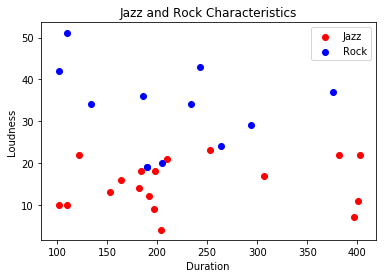

In [4]:
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)

plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)

plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

In [6]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


6040
[[101.5  101.5  101.5  ... 101.5  101.5  101.5 ]
 [101.55 101.55 101.55 ... 101.55 101.55 101.55]
 [101.6  101.6  101.6  ... 101.6  101.6  101.6 ]
 ...
 [403.35 403.35 403.35 ... 403.35 403.35 403.35]
 [403.4  403.4  403.4  ... 403.4  403.4  403.4 ]
 [403.45 403.45 403.45 ... 403.45 403.45 403.45]]


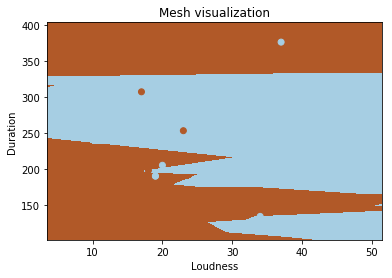

In [7]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
# (high range .01 <--> 10)
h = .05

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

print(len(xx))
print(yy)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

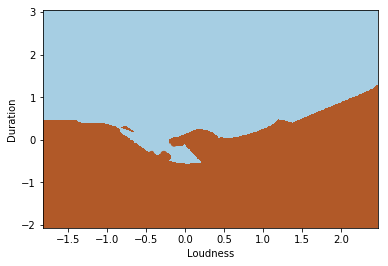

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [29]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.pyplot import subplots, show
import ast
import math
import re
from scipy.stats import ttest_ind, mannwhitneyu, median_test, f_oneway
import missingno as msno
from IPython.display import display
from IPython.core.debugger import Tracer

%matplotlib inline

In [30]:
# change optional settings for libraries
sns.set_style("whitegrid")
pd.set_option('show_dimensions', False)
np.warnings.filterwarnings('ignore')

In [31]:
filename = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [32]:
heartdisease = []

for path in filename:
    tempdf = pd.read_csv('../data/heart/' + path, names=colnames)
    tempname = re.findall(r'\.([a-z]*)\.',path)[0]
    # adds location of data to the dataframe
    tempdf['location'] = tempname
    heartdisease.append(tempdf)

heartdf = pd.concat(heartdisease)

In [33]:
heartdf['location'].loc[heartdf['num'] == 0].value_counts()

heartdf['location'] = pd.Categorical(heartdf['location'])

__Missing Data__

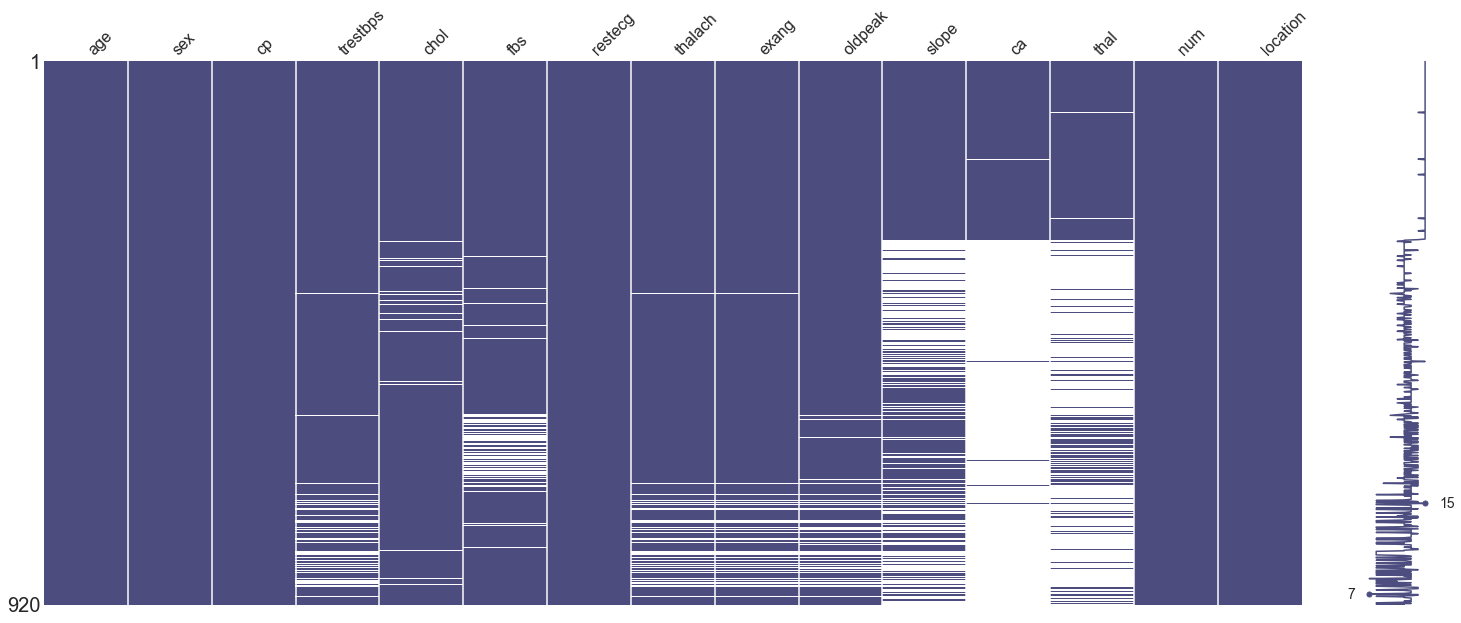

In [34]:
# check for missing data
heartdf = heartdf.replace('?',np.nan)

msno.matrix(heartdf,color=(.3, .3, .5))
plt.show()

__Delete variables with large number of null values__

In [35]:
del heartdf['slope']
del heartdf['ca']
del heartdf['thal']

__Clean null value rows from dataframe and convert strings to floats__

In [36]:
print("Location Count Before DropNA:\n{}".format(heartdf['location'].value_counts()))

heart = heartdf.loc[heartdf['chol'] != 0].dropna()

for column in heart.columns:
    if column != 'location':
        heart[column] = pd.to_numeric(heart[column])
        
print("\nLocation Count After DropNA:\n{}".format(heart['location'].value_counts()))

heart = heart.loc[heart['trestbps'] != 0]
heart = heart.loc[heart['chol'] != 0]

Location Count Before DropNA:
cleveland      303
hungarian      294
va             200
switzerland    123
Name: location, dtype: int64

Location Count After DropNA:
cleveland      303
hungarian      261
va             130
switzerland      0
Name: location, dtype: int64


In [39]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0,cleveland


In [41]:
heart['disease'] = heart['num'].apply(lambda val: 1 if val > 0 else 0)

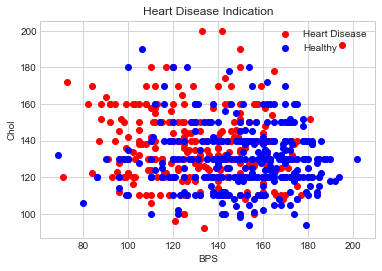

In [54]:
# Look at our data.
plt.scatter(
    heart[heart['disease'] == 1].thalach,
    heart[heart['disease'] == 1].trestbps,
    color='red'
)

plt.scatter(
    heart[heart['disease'] == 0].thalach,
    heart[heart['disease'] == 0].trestbps,
    color='blue'
)

plt.legend(['Heart Disease', 'Healthy'])
plt.title('Heart Disease Indication')
plt.xlabel('BPS')
plt.ylabel('Chol')
plt.show()

In [55]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = heart[['thalach', 'trestbps']]
Y = heart.disease
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[400, 120]])

array([1])

In [59]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = heart[['thalach', 'trestbps']]
Y = heart.disease
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0. 1.]]


218
[[ 91.5  91.5  91.5 ...  91.5  91.5  91.5]
 [ 92.   92.   92.  ...  92.   92.   92. ]
 [ 92.5  92.5  92.5 ...  92.5  92.5  92.5]
 ...
 [199.  199.  199.  ... 199.  199.  199. ]
 [199.5 199.5 199.5 ... 199.5 199.5 199.5]
 [200.  200.  200.  ... 200.  200.  200. ]]


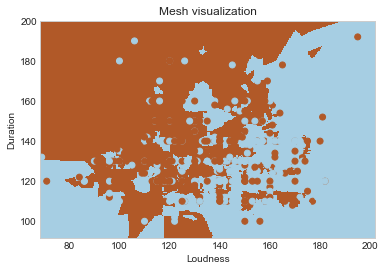

In [60]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
# (high range .01 <--> 10)
h = .5

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

print(len(xx))
print(yy)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()